## AML Project : Polish Bankruptcy Data
*Algorithm : Logistic Regression*

In [1]:
# Import libraries
'''Main'''
from scipy.io import arff
import numpy as np
import pandas as pd
import os, time

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc

'''Algorithms'''
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

<font color= 'blue'>Loading Datasets</font>


---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/3. IU Courses/Courses/4. Applied Machine Learning/Project_Shared/Data Folder'

In [4]:
data_1 = pd.read_excel(os.path.join(path, "year1.xlsx"))
data_2 = pd.read_excel(os.path.join(path, "year2.xlsx"))
data_3 = pd.read_excel(os.path.join(path, "year3.xlsx"))
data_4 = pd.read_excel(os.path.join(path, "year4.xlsx"))
data_5 = pd.read_excel(os.path.join(path, "year5.xlsx"))

<font color = 'blue'> Modeling Functions</font>

---



In [5]:
def baseline_model (data, scaling_type, test_size):
    # Seperating features from class variables
    X = data.drop(['class', 'df_year'] , axis = 1)
    y = data['class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size = test_size, 
                                                      random_state = 42, 
                                                      stratify=y)
  # Select scaling type
    if scaling_type == "RobustScaler":
        sc = pp.RobustScaler()
    else:
        sc = pp.StandardScaler()

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    print(y_train.value_counts())
    
  # Model Fit
    model = LogisticRegression()
  
    model.fit(X_train,y_train)

  # Model Prediction
    y_pred = model.predict(X_test)
#     y_pred = [1 if i>=1 else 0 for i in y_pred] # as provides in the underlying paper

    return y_test, y_pred

In [6]:
def performance_metrics(y_testset, y_predicted):
    # Metrics
    accuracy = accuracy_score(y_testset, y_predicted)
 
    # precision tp / (tp + fp)
    precision = precision_score(y_testset, y_predicted)
 
    # recall: tp / (tp + fn)
    recall = recall_score(y_testset, y_predicted)
 
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_testset, y_predicted)
    print(f'F1 score: {f1:.5%}')
    
    # AUC
    auc = roc_auc_score(y_testset, y_predicted)

    return accuracy, precision, recall, f1, auc


In [7]:
def conf_matrix(y_testset, y_predicted, data_name):
  
    # Creating Confusion Matrix
    cf_matrix = confusion_matrix(y_testset, y_predicted)

    fig = plt.gcf()
    fig.set_size_inches(9, 6)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
    ax.set_title('Confusion Matrix on Test Set');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()

    return

In [8]:
def plot_roc_curve(test_y, model_prob, n, axes1, auc):
  
  false_positive_rate, true_positive_rate, thresolds_ = roc_curve(y_testset, model_prob)
      
  
  # plt.figure(figsize=(4, 6), dpi=100)
  axes1[n-1].axis('scaled')
  axes1[n-1].set_xlim([0, 1])
  axes1[n-1].set_ylim([0, 1])
  axes1[n-1].plot([0,1], [0,1], linestyle='--',linewidth = 1)
  axes1[n-1].plot(false_positive_rate, true_positive_rate, 'lightblue')  
  axes1[n-1].fill_between(false_positive_rate, true_positive_rate, facecolor='orange', alpha=0.8)
  axes1[n-1].text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, color='black')
  axes1[n-1].set_xlabel("False Positive Rate")
  axes1[n-1].set_ylabel("True Positive Rate")
  axes1[n-1].title.set_text(f'Year{str(n)} - AUC & ROC Curve')
  #plt.show()
  
  return

<font color ='blue'> Model Results </font>

---



In [9]:
# For Summary Results & comparison
plot_data = {'Data_Name':[], 'Accuracy': [], "Precision": [],
             "Recall": [], 'F1_score': [], 'Scale_Type': [], 
             'AUC': [],'Test_size' : [], 'Model' : [], 'Activation' :[] }

0    6080
1     244
Name: class, dtype: int64
F1 score: 5.26316%
0    8795
1     360
Name: class, dtype: int64
F1 score: 5.17241%
0    9007
1     445
Name: class, dtype: int64
F1 score: 3.17460%
0    8349
1     463
Name: class, dtype: int64
F1 score: 7.05882%
0    4950
1     369
Name: class, dtype: int64
F1 score: 25.35211%


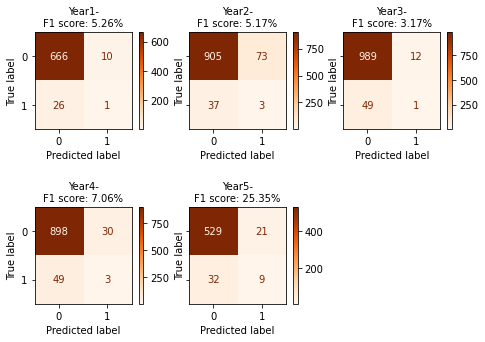

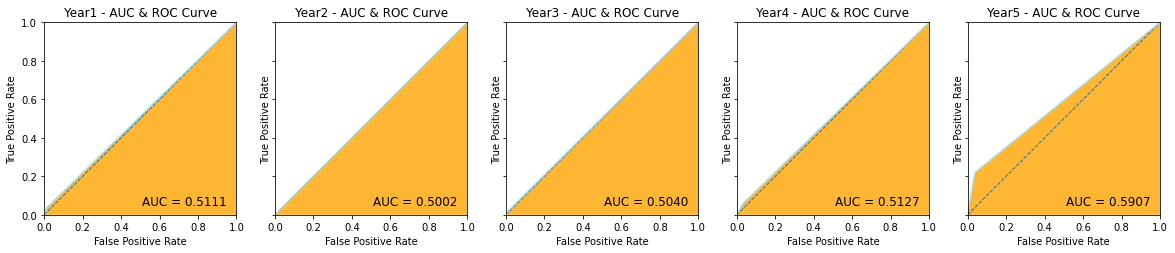

In [10]:
datasets = [data_1, data_2, data_3, data_4, data_5]
n = 1
scaling = "RobustScaler"  # StandardScaler
test_size = .1
i = 0
activation = 'none'

f, axes = plt.subplots(2, 3, figsize=(8, 5), sharey='row', )
axes = axes.flatten()

f1, axes1 = plt.subplots(1, 5, figsize=(20, 4), sharey='row')

for df in datasets:
    data_name = 'Year' + str(n)
    y_testset, y_predicted = baseline_model(df, scaling_type = scaling, test_size = test_size)
    accuracy, precision, recall, f1, auc= performance_metrics(y_testset, y_predicted)
  
    plot_data['Data_Name'].append(data_name)
    plot_data['Accuracy'].append(accuracy)
    plot_data['Precision'].append(precision)
    plot_data['Recall'].append(recall)
    plot_data['F1_score'].append(f1)
    plot_data['Scale_Type'].append(scaling)
    plot_data['AUC'].append(auc)
    plot_data['Test_size'].append(test_size)
    plot_data['Model'].append('Logistic Regression') # Change as per model
    plot_data['Activation'].append(activation)
    
    plot_roc_curve(y_testset, y_predicted, n, axes1, auc)
    # print(f'Confusion matrix for dataset {data_name}')
    cm = confusion_matrix(y_testset, y_predicted)
    cmd = ConfusionMatrixDisplay(cm)
    cmd.plot(cmap='Oranges', ax=axes[i])
    axes[i].set_title(f'Year{str(n)}-\nF1 score: {f1:.2%}', fontsize = 10)
    axes[5].set_axis_off()
    i+=1
    n+=1
f.subplots_adjust(hspace=.8)
f.subplots_adjust(wspace=0.12)
plt.show()


In [11]:
Performance_numbers = pd.DataFrame(plot_data)

In [12]:
Performance_numbers

,Data_Name,Accuracy,Precision,Recall,F1_score,Scale_Type,AUC,Test_size,Model,Activation
0,Year1,0.948791,0.090909,0.037037,0.052632,RobustScaler,0.511122,0.1,Logistic Regression,none
1,Year2,0.891945,0.039474,0.075000,0.051724,RobustScaler,0.500179,0.1,Logistic Regression,none
2,Year3,0.941960,0.076923,0.020000,0.031746,RobustScaler,0.504006,0.1,Logistic Regression,none
3,Year4,0.919388,0.090909,0.057692,0.070588,RobustScaler,0.512682,0.1,Logistic Regression,none
4,Year5,0.910321,0.300000,0.219512,0.253521,RobustScaler,0.590665,0.1,Logistic Regression,none


In [13]:
# Change Filename as per model
Performance_numbers.to_excel(os.path.join(path,'LogisticRegression_Results.xlsx'), index = False) 